In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
titanic_data=pd.read_csv(r"/content/Titanic_Dataset.csv")
titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.00,0,0,113501,30.0000,D6,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,B41,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.00,0,0,2699,18.7875,NaN,C


# UNDERSTANDING THE DATA

In [7]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# DATA PREPROCESSING - HANDLING NULL VALUES

<Axes: >

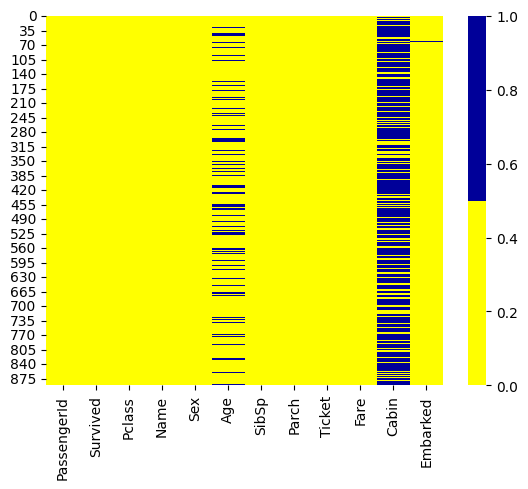

In [9]:
cols=titanic_data.columns
color=["#ffff00","#000099"]
sns.heatmap(titanic_data[cols].isnull(),cmap=sns.color_palette(color))

In [10]:
titanic_data.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [11]:
titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace=True)

<ipython-input-11-4bbdbb6634de>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace=True)


In [12]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)

<ipython-input-12-66c2bbd9bd03>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)


In [13]:
titanic_data=titanic_data.drop(columns=["Cabin"],axis=1)

<Axes: >

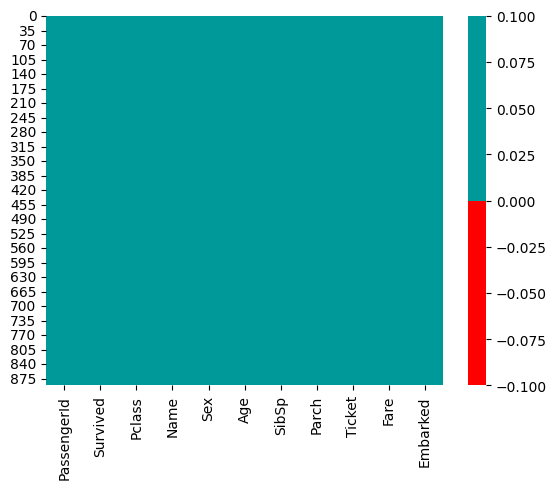

In [15]:
cols=titanic_data.columns
color=["#ff0000","#009999"]
sns.heatmap(titanic_data[cols].isnull(),cmap=sns.color_palette(color))

In [17]:
titanic_data.isnull().mean()*100

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


# DATA VISUALIZATION (UNIVARIATE AND BIVARIATE ANALYSIS)

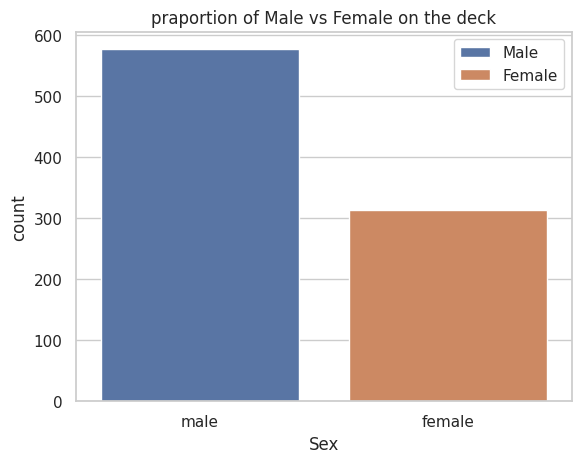

In [20]:
sns.set_theme(style="whitegrid")
sns.countplot(data=titanic_data,x="Sex",order=titanic_data["Sex"].value_counts().index,hue="Sex")
plt.title("praportion of Male vs Female on the deck")
plt.legend(["Male","Female"])
plt.show()

In [22]:
a=titanic_data["Survived"].value_counts()
percent=round(a/891*100,2)
percent

,count
Survived,
0,61.62
1,38.38


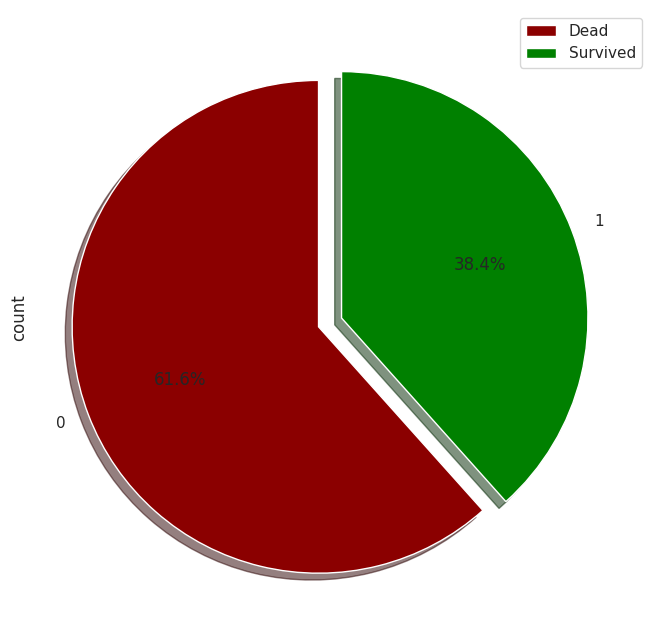

In [23]:
explode=(0.1,0)
percent.plot(figsize=(10,8),kind="pie",autopct="%1.1f%%",shadow=True,startangle=90,explode=explode,colors=["darkred","green"])
plt.legend(["Dead","Survived"])

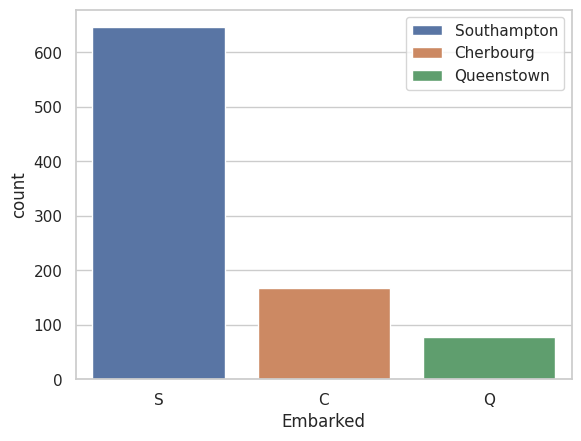

In [25]:
sns.countplot(data=titanic_data,x="Embarked",order=titanic_data["Embarked"].value_counts().index,hue="Embarked")
plt.legend(["Southampton","Cherbourg","Queenstown"])
plt.show()

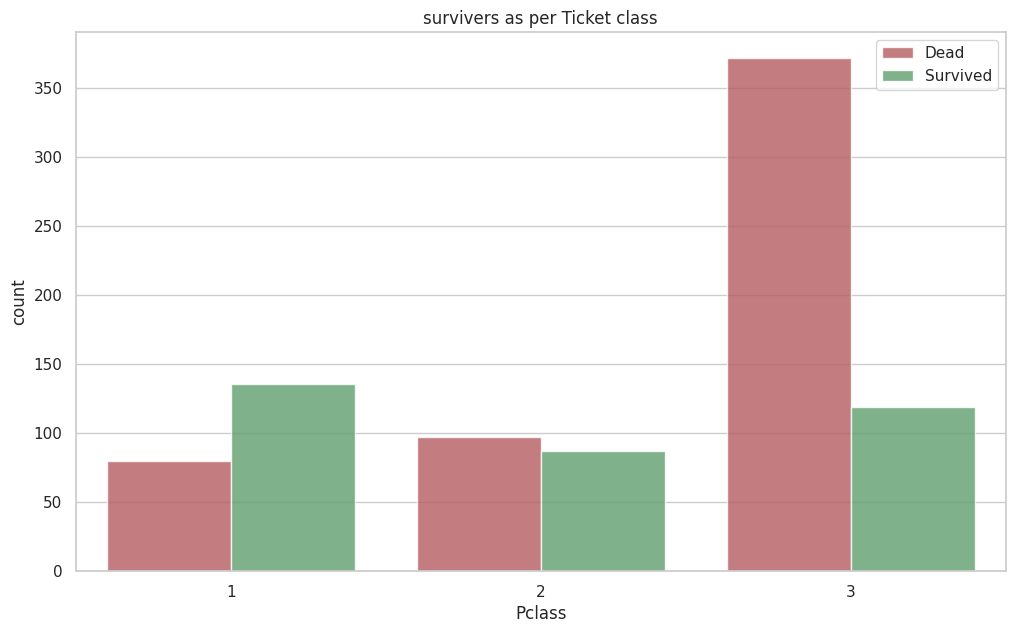

In [27]:
plt.figure(figsize=(12,7))
sns.countplot(x="Pclass",data=titanic_data,hue="Survived",palette=['r','g'],alpha=.8)
plt.title("survivers as per Ticket class")
plt.legend(["Dead","Survived"])

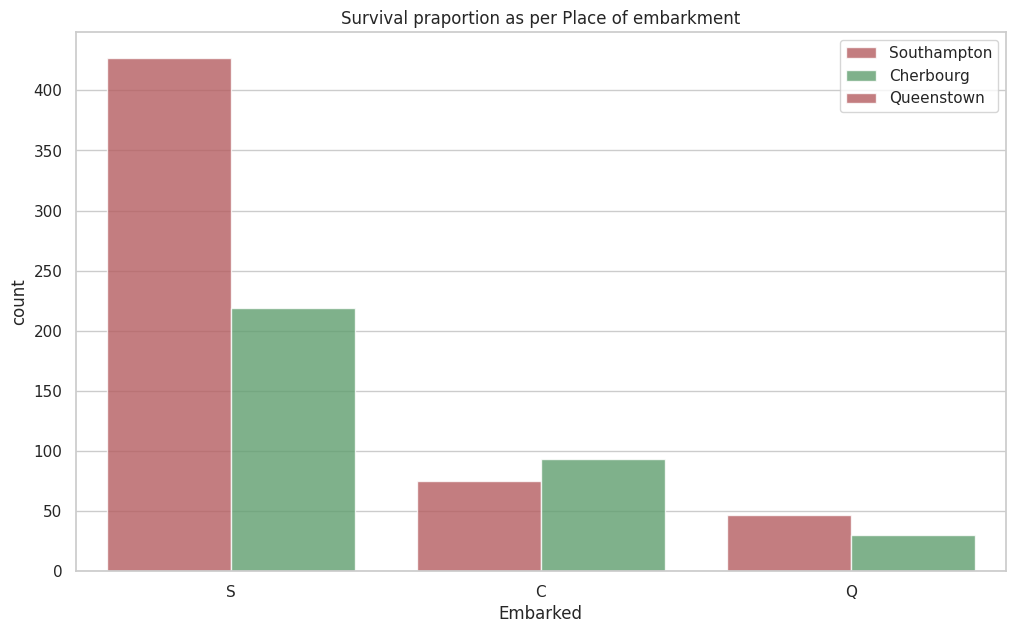

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(x="Embarked",data=titanic_data,hue="Survived",palette=["r","g"],alpha=.8)
plt.title("Survival praportion as per Place of embarkment")
plt.legend(["Southampton","Cherbourg","Queenstown"])
plt.show()

# MODEL BUILDING

In [29]:
titanic_data.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

<ipython-input-29-751d102a04b6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)


In [30]:
titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",1,2.0,1,2,113781,151.5500,0
614,615,0,3,"Brocklebank, Mr. William Alfred",0,35.0,0,0,364512,8.0500,0
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,0
793,794,0,1,"Hoyt, Mr. William Fisher",0,28.0,0,0,PC 17600,30.6958,1
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",1,50.0,0,1,230433,26.0000,0


In [31]:
X=titanic_data.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
Y=titanic_data["Survived"]

In [33]:
X_train ,X_test , Y_train , Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(X_train.shape,X_test.shape)

(712, 7) (179, 7)


In [35]:
model=LogisticRegression()

In [36]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
train_predict=model.predict(X_train)
train_predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [46]:
accuracy_train_data=accuracy_score(Y_train,train_predict)
accuracy_train_data

0.8089887640449438

In [48]:
test_predict=model.predict(X_test)
test_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [49]:
accuracy_test_data=accuracy_score(Y_test,test_predict)
accuracy_test_data

0.7821229050279329